In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Univariate linear regression


## Our data
We have one column of datapoints with one column of real valued labels. E.g. the house size in $m^2$ and the price of the house in thousands of CZK.
For easier manipulation, we put our size data into a matrix of two columns instead of a column vector by setting the $x_0$ to 1 and $x_1$ to be our size values. We put our labels (price in thousands of CZK) into a column vector.

$$
X = 
\begin{bmatrix}
    1 & 52  \\
    1 & 75  \\
    1 & 90 \\
    1 & 120 \\
\end{bmatrix}, 
y = 
\begin{bmatrix}
    1650  \\
    2000  \\
    2500 \\
    2750  \\
\end{bmatrix}\\
$$




In [2]:
X = np.array([[1.,52.], [1.,75.], [1.,90.], [1.,120.]])
y = np.array([[1650.],[2000.],[2500.],[2750.]])

print('X \nof shape {} = \n\n{}\n'.format(X.shape, X))
print('y \nof shape {} = \n\n{}\n'.format(y.shape, y))

X 
of shape (4, 2) = 

[[  1.  52.]
 [  1.  75.]
 [  1.  90.]
 [  1. 120.]]

y 
of shape (4, 1) = 

[[1650.]
 [2000.]
 [2500.]
 [2750.]]



## Model (or hypothesis)
Since linear regression is about fitting a straight line to our data, our model will consist of two parameters $θ$.
$θ_0$ moves our line vertically and $θ_1$ defines its slope. In order to have the line $h_θ(x)$ nicely fitted over our data, we need to find the right $θ_0$ and $θ_1$. 

$$h_θ(x)=θ_0 + θ_1 x$$

## Cost function (or loss function)
How do we know that our line $h_θ(x)$ fitted our data nicely? We use some metric. In this example we use the least square error. Our aim is to find the parameters θ so the cost function is minimized.

$$J(θ) = J(θ_0, θ_1) = \frac{1}{2m} \sum_{i=1}^m (h_θ(x^{(i)}) - y^{(i)})^2$$

## Normal equation
To get the results using normal equation, we just derivate the vectorized cost function and put it equal to 0. After the simplification we get the following formula for computing the vector $θ$.
$$θ = (X^T X)^{-1} X^T y$$

In [3]:
# Use np.linalg.inv for matrix inversion not np.invert!
XT = X.transpose()
theta = np.linalg.inv(XT.dot(X)).dot(XT).dot(y)

# instead of XT.dot(X) you can also use np.matmul(XT, X) but it is more verbose
#theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(XT,X)), XT), y)

print('Our results using Normal equation: ', theta.ravel())

Our results using Normal equation:  [808.29998974  16.81543039]


## Testing results with sklearn library

In [4]:
# Test using standard Python ML library sklearn
reg = LinearRegression(fit_intercept=False).fit(X, y)
print('Our results using sklearn library: ', reg.coef_.ravel())

Our results using sklearn library:  [808.29998974  16.81543039]


## Results from excel
<img src="img/excel.png">

## Gradient descent

If we have a lot of data, we are not able to compute θ with normal equation, because we have to calculate the $(X^T X)^{-1}$ which has the time complexity of $O(n^3)$. In other words it would take an insane amount of time (of course it depends on the amount of data). The good practice is to use Gradient Descent if we have $n > 10 000$ data points. The gradient descent algorithm is defined as follows:

$$θ_{j+1} := θ_j - \alpha \frac{\partial}{\partial\theta_j}J(θ_0, θ_1)$$

After we do the partial derivative by hand we get the following formula which can be programmed:
$$θ_{j+1} := θ_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)}) - y^{(i)}) x_j^{(i)}$$


In [5]:
def hypothesis(x, theta):
    # Computes our prediction of y given by our input x and parameters theta
    return x.dot(theta)

def least_square(error, m):
    # Computes the least squared error which is a sum of squares of error for each sample
    return np.sum(error ** 2) / (2*m)

def cost_function(x, y, theta, m, metric=least_square):
    # Computes the cost (loss) defined by the metric that is being used
    error = hypothesis(x, theta) - y
    return metric(error, m)

def gradient_descent(x, y, theta, alpha, iters, cf=cost_function, hypo=hypothesis):
    # Algorithm that computes the gradient of Cost function and adjusts θ so the Cost function is minimized.
    m = y.size
    theta_history = []
    loss_history = []
    
    for i in range(iters):
        loss = cf(x, y, theta, m) # Justs for information purposes
        print('Epoch: {} \t| Loss: {}'.format(i+1, loss))
        loss_history.append(loss) # Justs for plotting purposes
        theta_history.append(theta.ravel()) # Justs for plotting purposes
        # Actual adjustment of θ
        theta = theta - ((alpha/m) * np.sum((hypo(x, theta) - y) * x, axis=0)).reshape((-1, 1))
        
    return theta, theta_history, loss_history

In [6]:
# Feature scaling - this step is essential, gradient descent does not converge without it
X_scaled = X / X.max(axis=0)

# Initial theta
initial_theta = np.array([[0],[0]])

# Hyperparameters
alpha = 0.1
iters = 10000

# Training
theta_scaled, theta_history, loss_history = gradient_descent(X_scaled, y, initial_theta, alpha, iters)
theta = np.array([[theta_scaled.ravel()[0]],[theta_scaled.ravel()[1] / X.max(axis=0)[1]]])
print('Learned scaled theta:', theta_scaled.ravel())
print('Theta rescaled back:', theta.ravel())

Epoch: 1 	| Loss: 2566875.0
Epoch: 2 	| Loss: 1858139.8794211154
Epoch: 3 	| Loss: 1346911.6068558283
Epoch: 4 	| Loss: 978142.0085027962
Epoch: 5 	| Loss: 712125.7214505367
Epoch: 6 	| Loss: 520223.90541090735
Epoch: 7 	| Loss: 381779.8248009275
Epoch: 8 	| Loss: 281894.10772882204
Epoch: 9 	| Loss: 209820.07609827654
Epoch: 10 	| Loss: 157806.32303287694
Epoch: 11 	| Loss: 120261.88259607353
Epoch: 12 	| Loss: 93154.08014317087
Epoch: 13 	| Loss: 73574.21146920112
Epoch: 14 	| Loss: 59424.27416678653
Epoch: 15 	| Loss: 49191.01199525157
Epoch: 16 	| Loss: 41782.93671982039
Epoch: 17 	| Loss: 36412.77458663732
Epoch: 18 	| Loss: 32512.676856690527
Epoch: 19 	| Loss: 29673.06252822656
Epoch: 20 	| Loss: 27598.506576465377
Epoch: 21 	| Loss: 26075.922850669154
Epoch: 22 	| Loss: 24951.614909731405
Epoch: 23 	| Loss: 24114.723159129644
Epoch: 24 	| Loss: 23485.28553713002
Epoch: 25 	| Loss: 23005.62587983309
Epoch: 26 	| Loss: 22634.142487422923
Epoch: 27 	| Loss: 22340.827916922986
Epoc

Epoch: 1409 	| Loss: 5442.8906498090055
Epoch: 1410 	| Loss: 5442.851838762098
Epoch: 1411 	| Loss: 5442.813245288456
Epoch: 1412 	| Loss: 5442.774868168386
Epoch: 1413 	| Loss: 5442.736706189022
Epoch: 1414 	| Loss: 5442.698758144273
Epoch: 1415 	| Loss: 5442.661022834866
Epoch: 1416 	| Loss: 5442.623499068186
Epoch: 1417 	| Loss: 5442.586185658327
Epoch: 1418 	| Loss: 5442.54908142606
Epoch: 1419 	| Loss: 5442.512185198721
Epoch: 1420 	| Loss: 5442.47549581026
Epoch: 1421 	| Loss: 5442.439012101144
Epoch: 1422 	| Loss: 5442.402732918312
Epoch: 1423 	| Loss: 5442.366657115262
Epoch: 1424 	| Loss: 5442.330783551791
Epoch: 1425 	| Loss: 5442.295111094167
Epoch: 1426 	| Loss: 5442.259638615011
Epoch: 1427 	| Loss: 5442.224364993269
Epoch: 1428 	| Loss: 5442.189289114112
Epoch: 1429 	| Loss: 5442.154409869021
Epoch: 1430 	| Loss: 5442.119726155694
Epoch: 1431 	| Loss: 5442.0852368779515
Epoch: 1432 	| Loss: 5442.050940945794
Epoch: 1433 	| Loss: 5442.016837275377
Epoch: 1434 	| Loss: 5441

Epoch: 1953 	| Loss: 5436.29266585758
Epoch: 1954 	| Loss: 5436.29084286197
Epoch: 1955 	| Loss: 5436.289030086018
Epoch: 1956 	| Loss: 5436.287227472396
Epoch: 1957 	| Loss: 5436.285434964164
Epoch: 1958 	| Loss: 5436.28365250469
Epoch: 1959 	| Loss: 5436.281880037592
Epoch: 1960 	| Loss: 5436.280117506902
Epoch: 1961 	| Loss: 5436.278364856862
Epoch: 1962 	| Loss: 5436.276622032134
Epoch: 1963 	| Loss: 5436.27488897761
Epoch: 1964 	| Loss: 5436.2731656385195
Epoch: 1965 	| Loss: 5436.271451960404
Epoch: 1966 	| Loss: 5436.269747889124
Epoch: 1967 	| Loss: 5436.268053370782
Epoch: 1968 	| Loss: 5436.266368351853
Epoch: 1969 	| Loss: 5436.264692779077
Epoch: 1970 	| Loss: 5436.2630265994985
Epoch: 1971 	| Loss: 5436.261369760461
Epoch: 1972 	| Loss: 5436.259722209626
Epoch: 1973 	| Loss: 5436.2580838948625
Epoch: 1974 	| Loss: 5436.2564547644515
Epoch: 1975 	| Loss: 5436.254834766854
Epoch: 1976 	| Loss: 5436.253223850955
Epoch: 1977 	| Loss: 5436.251621965732
Epoch: 1978 	| Loss: 5436

Epoch: 2674 	| Loss: 5435.973124230205
Epoch: 2675 	| Loss: 5435.9730925730255
Epoch: 2676 	| Loss: 5435.973061093284
Epoch: 2677 	| Loss: 5435.973029790029
Epoch: 2678 	| Loss: 5435.972998662278
Epoch: 2679 	| Loss: 5435.972967709001
Epoch: 2680 	| Loss: 5435.972936929264
Epoch: 2681 	| Loss: 5435.972906322084
Epoch: 2682 	| Loss: 5435.972875886462
Epoch: 2683 	| Loss: 5435.972845621463
Epoch: 2684 	| Loss: 5435.972815526139
Epoch: 2685 	| Loss: 5435.972785599552
Epoch: 2686 	| Loss: 5435.972755840694
Epoch: 2687 	| Loss: 5435.972726248654
Epoch: 2688 	| Loss: 5435.972696822545
Epoch: 2689 	| Loss: 5435.972667561386
Epoch: 2690 	| Loss: 5435.972638464271
Epoch: 2691 	| Loss: 5435.9726095302585
Epoch: 2692 	| Loss: 5435.9725807584555
Epoch: 2693 	| Loss: 5435.972552147942
Epoch: 2694 	| Loss: 5435.972523697828
Epoch: 2695 	| Loss: 5435.972495407189
Epoch: 2696 	| Loss: 5435.972467275137
Epoch: 2697 	| Loss: 5435.9724393008155
Epoch: 2698 	| Loss: 5435.972411483313
Epoch: 2699 	| Loss: 

Epoch: 3375 	| Loss: 5435.967586905856
Epoch: 3376 	| Loss: 5435.967586290706
Epoch: 3377 	| Loss: 5435.967585678989
Epoch: 3378 	| Loss: 5435.967585070684
Epoch: 3379 	| Loss: 5435.967584465822
Epoch: 3380 	| Loss: 5435.967583864354
Epoch: 3381 	| Loss: 5435.967583266233
Epoch: 3382 	| Loss: 5435.967582671475
Epoch: 3383 	| Loss: 5435.967582080043
Epoch: 3384 	| Loss: 5435.96758149194
Epoch: 3385 	| Loss: 5435.967580907118
Epoch: 3386 	| Loss: 5435.96758032559
Epoch: 3387 	| Loss: 5435.967579747336
Epoch: 3388 	| Loss: 5435.967579172292
Epoch: 3389 	| Loss: 5435.967578600487
Epoch: 3390 	| Loss: 5435.967578031878
Epoch: 3391 	| Loss: 5435.967577466464
Epoch: 3392 	| Loss: 5435.967576904234
Epoch: 3393 	| Loss: 5435.967576345129
Epoch: 3394 	| Loss: 5435.967575789184
Epoch: 3395 	| Loss: 5435.967575236339
Epoch: 3396 	| Loss: 5435.967574686578
Epoch: 3397 	| Loss: 5435.967574139925
Epoch: 3398 	| Loss: 5435.967573596342
Epoch: 3399 	| Loss: 5435.967573055789
Epoch: 3400 	| Loss: 5435.9

Epoch: 3902 	| Loss: 5435.967482843656
Epoch: 3903 	| Loss: 5435.967482811865
Epoch: 3904 	| Loss: 5435.967482780254
Epoch: 3905 	| Loss: 5435.967482748808
Epoch: 3906 	| Loss: 5435.967482717535
Epoch: 3907 	| Loss: 5435.967482686478
Epoch: 3908 	| Loss: 5435.967482655554
Epoch: 3909 	| Loss: 5435.9674826248065
Epoch: 3910 	| Loss: 5435.967482594253
Epoch: 3911 	| Loss: 5435.9674825638585
Epoch: 3912 	| Loss: 5435.96748253363
Epoch: 3913 	| Loss: 5435.967482503588
Epoch: 3914 	| Loss: 5435.967482473691
Epoch: 3915 	| Loss: 5435.967482443967
Epoch: 3916 	| Loss: 5435.967482414409
Epoch: 3917 	| Loss: 5435.967482385033
Epoch: 3918 	| Loss: 5435.967482355814
Epoch: 3919 	| Loss: 5435.967482326756
Epoch: 3920 	| Loss: 5435.967482297861
Epoch: 3921 	| Loss: 5435.967482269128
Epoch: 3922 	| Loss: 5435.967482240562
Epoch: 3923 	| Loss: 5435.967482212155
Epoch: 3924 	| Loss: 5435.967482183894
Epoch: 3925 	| Loss: 5435.967482155787
Epoch: 3926 	| Loss: 5435.967482127869
Epoch: 3927 	| Loss: 543

Epoch: 4451 	| Loss: 5435.967477431461
Epoch: 4452 	| Loss: 5435.9674774300165
Epoch: 4453 	| Loss: 5435.967477428564
Epoch: 4454 	| Loss: 5435.967477427127
Epoch: 4455 	| Loss: 5435.967477425696
Epoch: 4456 	| Loss: 5435.967477424282
Epoch: 4457 	| Loss: 5435.967477422873
Epoch: 4458 	| Loss: 5435.9674774214645
Epoch: 4459 	| Loss: 5435.967477420078
Epoch: 4460 	| Loss: 5435.96747741867
Epoch: 4461 	| Loss: 5435.967477417299
Epoch: 4462 	| Loss: 5435.9674774159375
Epoch: 4463 	| Loss: 5435.967477414561
Epoch: 4464 	| Loss: 5435.967477413205
Epoch: 4465 	| Loss: 5435.9674774118685
Epoch: 4466 	| Loss: 5435.9674774105215
Epoch: 4467 	| Loss: 5435.967477409172
Epoch: 4468 	| Loss: 5435.967477407851
Epoch: 4469 	| Loss: 5435.967477406548
Epoch: 4470 	| Loss: 5435.967477405221
Epoch: 4471 	| Loss: 5435.967477403927
Epoch: 4472 	| Loss: 5435.967477402632
Epoch: 4473 	| Loss: 5435.967477401324
Epoch: 4474 	| Loss: 5435.967477400034
Epoch: 4475 	| Loss: 5435.967477398766
Epoch: 4476 	| Loss: 

Epoch: 5269 	| Loss: 5435.967477175076
Epoch: 5270 	| Loss: 5435.967477175066
Epoch: 5271 	| Loss: 5435.967477175045
Epoch: 5272 	| Loss: 5435.96747717503
Epoch: 5273 	| Loss: 5435.967477175036
Epoch: 5274 	| Loss: 5435.967477174991
Epoch: 5275 	| Loss: 5435.967477174986
Epoch: 5276 	| Loss: 5435.967477174968
Epoch: 5277 	| Loss: 5435.967477174962
Epoch: 5278 	| Loss: 5435.967477174947
Epoch: 5279 	| Loss: 5435.96747717492
Epoch: 5280 	| Loss: 5435.967477174911
Epoch: 5281 	| Loss: 5435.967477174906
Epoch: 5282 	| Loss: 5435.967477174883
Epoch: 5283 	| Loss: 5435.967477174861
Epoch: 5284 	| Loss: 5435.967477174864
Epoch: 5285 	| Loss: 5435.967477174832
Epoch: 5286 	| Loss: 5435.967477174847
Epoch: 5287 	| Loss: 5435.967477174803
Epoch: 5288 	| Loss: 5435.967477174814
Epoch: 5289 	| Loss: 5435.96747717478
Epoch: 5290 	| Loss: 5435.967477174787
Epoch: 5291 	| Loss: 5435.967477174763
Epoch: 5292 	| Loss: 5435.9674771747605
Epoch: 5293 	| Loss: 5435.967477174737
Epoch: 5294 	| Loss: 5435.9

Epoch: 5542 	| Loss: 5435.967477173015
Epoch: 5543 	| Loss: 5435.967477173019
Epoch: 5544 	| Loss: 5435.967477173026
Epoch: 5545 	| Loss: 5435.967477173017
Epoch: 5546 	| Loss: 5435.967477173008
Epoch: 5547 	| Loss: 5435.967477173004
Epoch: 5548 	| Loss: 5435.967477173024
Epoch: 5549 	| Loss: 5435.967477173016
Epoch: 5550 	| Loss: 5435.967477172986
Epoch: 5551 	| Loss: 5435.967477173
Epoch: 5552 	| Loss: 5435.967477172995
Epoch: 5553 	| Loss: 5435.967477173004
Epoch: 5554 	| Loss: 5435.967477172993
Epoch: 5555 	| Loss: 5435.967477172995
Epoch: 5556 	| Loss: 5435.967477172982
Epoch: 5557 	| Loss: 5435.967477172988
Epoch: 5558 	| Loss: 5435.96747717299
Epoch: 5559 	| Loss: 5435.96747717297
Epoch: 5560 	| Loss: 5435.967477172977
Epoch: 5561 	| Loss: 5435.967477172962
Epoch: 5562 	| Loss: 5435.9674771729615
Epoch: 5563 	| Loss: 5435.967477172967
Epoch: 5564 	| Loss: 5435.967477172966
Epoch: 5565 	| Loss: 5435.967477172962
Epoch: 5566 	| Loss: 5435.967477172953
Epoch: 5567 	| Loss: 5435.967

Epoch: 6450 	| Loss: 5435.967477172473
Epoch: 6451 	| Loss: 5435.967477172461
Epoch: 6452 	| Loss: 5435.967477172461
Epoch: 6453 	| Loss: 5435.967477172458
Epoch: 6454 	| Loss: 5435.967477172471
Epoch: 6455 	| Loss: 5435.9674771724585
Epoch: 6456 	| Loss: 5435.967477172469
Epoch: 6457 	| Loss: 5435.967477172466
Epoch: 6458 	| Loss: 5435.967477172463
Epoch: 6459 	| Loss: 5435.967477172468
Epoch: 6460 	| Loss: 5435.967477172461
Epoch: 6461 	| Loss: 5435.9674771724585
Epoch: 6462 	| Loss: 5435.967477172467
Epoch: 6463 	| Loss: 5435.967477172469
Epoch: 6464 	| Loss: 5435.967477172461
Epoch: 6465 	| Loss: 5435.967477172452
Epoch: 6466 	| Loss: 5435.967477172473
Epoch: 6467 	| Loss: 5435.967477172477
Epoch: 6468 	| Loss: 5435.967477172457
Epoch: 6469 	| Loss: 5435.967477172473
Epoch: 6470 	| Loss: 5435.967477172462
Epoch: 6471 	| Loss: 5435.967477172467
Epoch: 6472 	| Loss: 5435.967477172474
Epoch: 6473 	| Loss: 5435.967477172465
Epoch: 6474 	| Loss: 5435.9674771724685
Epoch: 6475 	| Loss: 5

Epoch: 6987 	| Loss: 5435.967477172474
Epoch: 6988 	| Loss: 5435.967477172464
Epoch: 6989 	| Loss: 5435.967477172476
Epoch: 6990 	| Loss: 5435.9674771724585
Epoch: 6991 	| Loss: 5435.96747717247
Epoch: 6992 	| Loss: 5435.967477172451
Epoch: 6993 	| Loss: 5435.967477172453
Epoch: 6994 	| Loss: 5435.967477172465
Epoch: 6995 	| Loss: 5435.967477172464
Epoch: 6996 	| Loss: 5435.967477172464
Epoch: 6997 	| Loss: 5435.967477172465
Epoch: 6998 	| Loss: 5435.967477172479
Epoch: 6999 	| Loss: 5435.967477172477
Epoch: 7000 	| Loss: 5435.967477172465
Epoch: 7001 	| Loss: 5435.967477172458
Epoch: 7002 	| Loss: 5435.967477172453
Epoch: 7003 	| Loss: 5435.967477172452
Epoch: 7004 	| Loss: 5435.967477172468
Epoch: 7005 	| Loss: 5435.967477172454
Epoch: 7006 	| Loss: 5435.9674771724685
Epoch: 7007 	| Loss: 5435.96747717247
Epoch: 7008 	| Loss: 5435.967477172461
Epoch: 7009 	| Loss: 5435.967477172465
Epoch: 7010 	| Loss: 5435.967477172459
Epoch: 7011 	| Loss: 5435.967477172469
Epoch: 7012 	| Loss: 5435

Epoch: 7449 	| Loss: 5435.967477172457
Epoch: 7450 	| Loss: 5435.967477172475
Epoch: 7451 	| Loss: 5435.967477172462
Epoch: 7452 	| Loss: 5435.967477172465
Epoch: 7453 	| Loss: 5435.967477172454
Epoch: 7454 	| Loss: 5435.9674771724585
Epoch: 7455 	| Loss: 5435.967477172468
Epoch: 7456 	| Loss: 5435.967477172456
Epoch: 7457 	| Loss: 5435.967477172471
Epoch: 7458 	| Loss: 5435.967477172469
Epoch: 7459 	| Loss: 5435.967477172457
Epoch: 7460 	| Loss: 5435.9674771724485
Epoch: 7461 	| Loss: 5435.967477172453
Epoch: 7462 	| Loss: 5435.967477172479
Epoch: 7463 	| Loss: 5435.967477172469
Epoch: 7464 	| Loss: 5435.967477172458
Epoch: 7465 	| Loss: 5435.967477172457
Epoch: 7466 	| Loss: 5435.967477172465
Epoch: 7467 	| Loss: 5435.96747717246
Epoch: 7468 	| Loss: 5435.9674771724485
Epoch: 7469 	| Loss: 5435.967477172462
Epoch: 7470 	| Loss: 5435.967477172462
Epoch: 7471 	| Loss: 5435.967477172471
Epoch: 7472 	| Loss: 5435.967477172462
Epoch: 7473 	| Loss: 5435.96747717247
Epoch: 7474 	| Loss: 543

Epoch: 8448 	| Loss: 5435.9674771724585
Epoch: 8449 	| Loss: 5435.967477172462
Epoch: 8450 	| Loss: 5435.967477172458
Epoch: 8451 	| Loss: 5435.967477172474
Epoch: 8452 	| Loss: 5435.967477172465
Epoch: 8453 	| Loss: 5435.967477172462
Epoch: 8454 	| Loss: 5435.967477172462
Epoch: 8455 	| Loss: 5435.967477172464
Epoch: 8456 	| Loss: 5435.967477172475
Epoch: 8457 	| Loss: 5435.96747717246
Epoch: 8458 	| Loss: 5435.967477172464
Epoch: 8459 	| Loss: 5435.96747717246
Epoch: 8460 	| Loss: 5435.967477172473
Epoch: 8461 	| Loss: 5435.96747717247
Epoch: 8462 	| Loss: 5435.967477172471
Epoch: 8463 	| Loss: 5435.9674771724685
Epoch: 8464 	| Loss: 5435.9674771724585
Epoch: 8465 	| Loss: 5435.967477172469
Epoch: 8466 	| Loss: 5435.967477172453
Epoch: 8467 	| Loss: 5435.967477172466
Epoch: 8468 	| Loss: 5435.9674771724585
Epoch: 8469 	| Loss: 5435.967477172453
Epoch: 8470 	| Loss: 5435.967477172459
Epoch: 8471 	| Loss: 5435.967477172468
Epoch: 8472 	| Loss: 5435.967477172454
Epoch: 8473 	| Loss: 543

Epoch: 8948 	| Loss: 5435.967477172468
Epoch: 8949 	| Loss: 5435.967477172463
Epoch: 8950 	| Loss: 5435.967477172473
Epoch: 8951 	| Loss: 5435.967477172451
Epoch: 8952 	| Loss: 5435.967477172461
Epoch: 8953 	| Loss: 5435.967477172457
Epoch: 8954 	| Loss: 5435.967477172452
Epoch: 8955 	| Loss: 5435.967477172457
Epoch: 8956 	| Loss: 5435.967477172471
Epoch: 8957 	| Loss: 5435.967477172457
Epoch: 8958 	| Loss: 5435.967477172469
Epoch: 8959 	| Loss: 5435.967477172478
Epoch: 8960 	| Loss: 5435.967477172451
Epoch: 8961 	| Loss: 5435.967477172458
Epoch: 8962 	| Loss: 5435.967477172465
Epoch: 8963 	| Loss: 5435.967477172471
Epoch: 8964 	| Loss: 5435.9674771724585
Epoch: 8965 	| Loss: 5435.967477172465
Epoch: 8966 	| Loss: 5435.967477172452
Epoch: 8967 	| Loss: 5435.967477172449
Epoch: 8968 	| Loss: 5435.967477172474
Epoch: 8969 	| Loss: 5435.967477172465
Epoch: 8970 	| Loss: 5435.967477172471
Epoch: 8971 	| Loss: 5435.96747717247
Epoch: 8972 	| Loss: 5435.967477172478
Epoch: 8973 	| Loss: 5435

Epoch: 9447 	| Loss: 5435.9674771724785
Epoch: 9448 	| Loss: 5435.967477172466
Epoch: 9449 	| Loss: 5435.967477172458
Epoch: 9450 	| Loss: 5435.967477172466
Epoch: 9451 	| Loss: 5435.967477172475
Epoch: 9452 	| Loss: 5435.967477172464
Epoch: 9453 	| Loss: 5435.967477172453
Epoch: 9454 	| Loss: 5435.967477172469
Epoch: 9455 	| Loss: 5435.967477172479
Epoch: 9456 	| Loss: 5435.9674771724485
Epoch: 9457 	| Loss: 5435.9674771724585
Epoch: 9458 	| Loss: 5435.967477172468
Epoch: 9459 	| Loss: 5435.967477172476
Epoch: 9460 	| Loss: 5435.967477172456
Epoch: 9461 	| Loss: 5435.967477172473
Epoch: 9462 	| Loss: 5435.967477172463
Epoch: 9463 	| Loss: 5435.967477172466
Epoch: 9464 	| Loss: 5435.967477172462
Epoch: 9465 	| Loss: 5435.967477172452
Epoch: 9466 	| Loss: 5435.967477172462
Epoch: 9467 	| Loss: 5435.967477172471
Epoch: 9468 	| Loss: 5435.967477172471
Epoch: 9469 	| Loss: 5435.967477172472
Epoch: 9470 	| Loss: 5435.967477172472
Epoch: 9471 	| Loss: 5435.967477172461
Epoch: 9472 	| Loss: 5

## Visualizing our fit

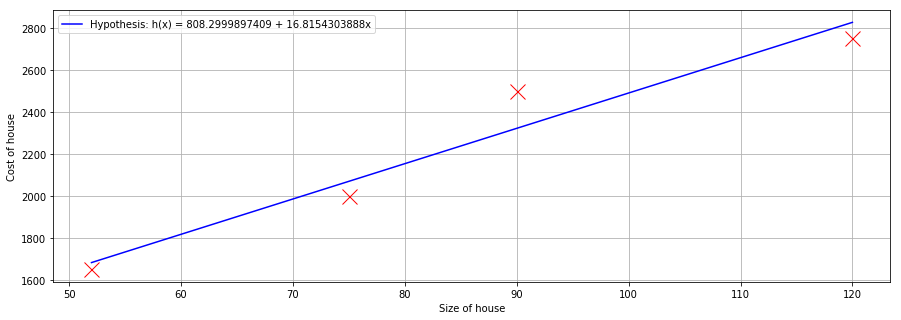

In [7]:
#Plot the data to see what it looks like
plt.figure(figsize=(15,5))
plt.plot(X[:,1],y[:,0],'rx',markersize=15)
plt.plot(X[:,1],hypothesis(X, theta),'b-',label = 'Hypothesis: h(x) = {0:.10f} + {1:.10f}x'.format(float(theta[0]),float(theta[1])))
plt.grid(True) #Always plot.grid true!
plt.xlabel('Size of house')
plt.ylabel('Cost of house')
plt.legend()
plt.show()

## Visualizing the convergence of Cost function

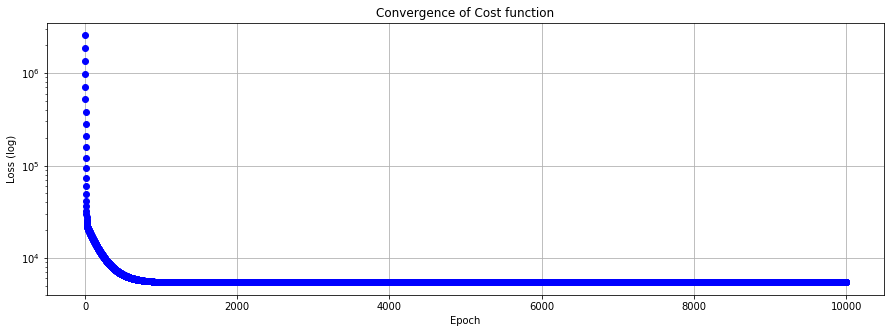

In [8]:
plt.figure(figsize=(15,5))
plt.semilogy(range(len(loss_history)),loss_history,'bo')
plt.grid(True)
plt.title("Convergence of Cost function")
plt.xlabel("Epoch")
plt.ylabel("Loss (log)")
plt.show()

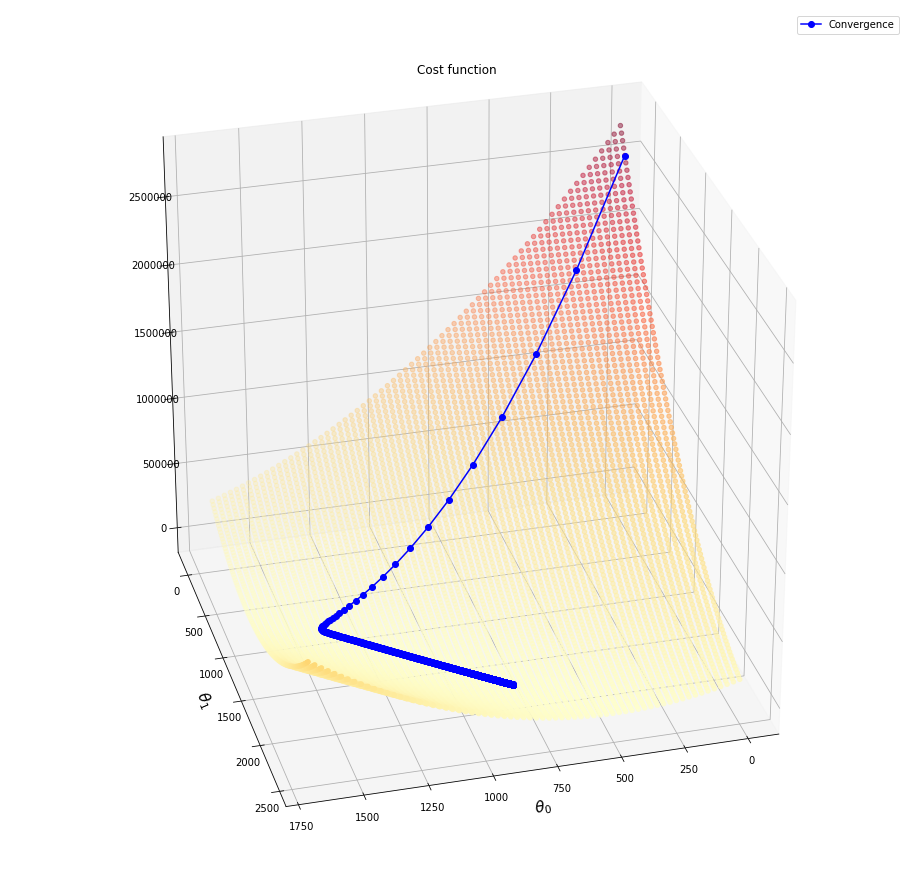

In [9]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')
ax.view_init(azim=75)

xvals = np.arange(0,1700, 25)
yvals = np.arange(-100,2500, 25)
myxs, myys, myzs = [], [], []
for a in xvals:
    for b in yvals:
        myxs.append(a)
        myys.append(b)
        myzs.append(cost_function(X_scaled, y, np.array([[a], [b]]), y.size))
scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=15)
plt.ylabel(r'$\theta_1$',fontsize=15)
plt.title('Cost function')
plt.plot([x[0] for x in theta_history],[x[1] for x in theta_history],loss_history,'bo-', label = 'Convergence')
plt.legend()
plt.show()

## Using our fitted model to predict the future

Suppose we want to buy two houses of $150m^2$ and $200m^2$. We want to know their prices. Unfortunately, we do not have the data about houses of $size > 120m^2$. But we are clever and we can use linear regression. We already found our $θ$, so now we just need to use it.

In [10]:
result = hypothesis(np.array([[1,150], [1,200]]), theta)
print(result)
print('\nPredicted price of the house of size {0} squared meters is {1:.2f} CZK.'.format(150, result.ravel()[0]*1000))
print('Predicted price of the house of size {0} squared meters is {1:.2f} CZK.'.format(200, result.ravel()[1]*1000))

[[3330.61454807]
 [4171.38606751]]

Predicted price of the house of size 150 squared meters is 3330614.55 CZK.
Predicted price of the house of size 200 squared meters is 4171386.07 CZK.


*** 

# 2. Multivariate linear regression

## Our data

In this case, we have multiple types of information about our house - multiple input variables. Still we just want to predict the price of the house. We prepare put our data into a matrix as in the univariate case. Just the matrix will have more columns. We put our labels (price in thousands of CZK) into a column vector.

Columns:
* $x_0$ - just 1
* $x_1$ - the size of the house in $m^2$
* $x_2$ - number of rooms
* $x_3$ - number of floors
* $x_4$ - age of the house


$$
X =
\begin{bmatrix}
    1 & 52 & 3 & 1 & 20 \\
    1 & 75 & 4 & 1 & 55 \\
    1 & 90 & 4 & 2 & 30 \\
    1 & 120& 5 & 2 & 35 \\
\end{bmatrix}, 
y = 
\begin{bmatrix}
    1650  \\
    2000  \\
    2500 \\
    2750  \\
\end{bmatrix}\\
$$


## Feature standardization

In this case we can prepare our features using standardization. We just subtract mean value of each column and divide by the standard deviation of that column. This method of feature preprocessing makes Gradient descent converge much faster.

$$x = (x - μ) / σ$$

WARNING: do feature standardization only on your variables, not on the $x_0$.

$$
X =
\begin{bmatrix}
    1 & 52 & 3 & 1 & 20 \\
    1 & 75 & 4 & 1 & 55 \\
    1 & 90 & 4 & 2 & 30 \\
    1 & 120& 5 & 2 & 35 \\
%         ... &  ... &  ... &  ... &  ... \\
%     x_0^m &  x_1^m &  x_2^m &  x_3^m &  x_4^m \\
\end{bmatrix}, 
\hat X =
\begin{bmatrix}
    1 & -1.306 & -1.414 & -1.000 & -1.176 \\
    1 & -0.374 &  0.000 & -1.000 &  1.568 \\
    1 &  0.232 &  0.000 &  1.000 & -0.392 \\
    1 &  1.448 &  1.414 &  1.000 &  0.000 \\
%     ... &  ... &  ... &  ... &  ... \\
%     x_0^m &  x_1^m &  x_2^m &  x_3^m &  x_4^m \\
\end{bmatrix}
$$




## Standardization with sklearn library

Not only that StandardScaler is quicker to use. It has more advantages than writing your own function, because the object "scaler" also stores the mean and std values for future rescaling of your data. You can just use trasform and inverse_transform methods. If you still want to write your own, it is as simple as this: 

```x = (x - x.mean(axis=0)) / x.std(axis=0)```

In [11]:
# Create our data matrices
X = np.array([[52.,3.,1.,20.], [75.,4.,1.,55.], [90.,4.,2.,30.], [120.,5.,2.,35.]])
y = np.array([[1650.],[2000.],[2500.],[2750.]])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) # goes through all our data and computes the meand and std
X = scaler.transform(X) # get the transformed data
print('If you ever need to rescale back, use inverse_transform:\n', scaler.inverse_transform(X))

# Insert column of 1's into the standardized "X" matrix
X = np.insert(X,0,1,axis=1)
X

If you ever need to rescale back, use inverse_transform:
 [[ 52.   3.   1.  20.]
 [ 75.   4.   1.  55.]
 [ 90.   4.   2.  30.]
 [120.   5.   2.  35.]]


array([[ 1.        , -1.30663482, -1.41421356, -1.        , -1.17669681],
       [ 1.        , -0.37477123,  0.        , -1.        ,  1.56892908],
       [ 1.        ,  0.2329659 ,  0.        ,  1.        , -0.39223227],
       [ 1.        ,  1.44844015,  1.41421356,  1.        ,  0.        ]])

## Model (or hypothesis)
In this case, the model has to take other variables into an account. Therefore there will be a separate parameters $θ$ for each of our variables. Again, we need to find the right $θ_n$. The updated formula looks like this:

$$h_θ(x)=θ_0 + θ_1 x_1 + θ_2 x_2 + ... + θ_n x_n$$

For simplicity of notation, we can use the formula in the vectorized form like this:

$$h_θ(x) = Xθ$$ 

## Cost function (or loss function)
Cost function remains the same as in the univariate case. But it takes all θ into an account. 

$$J(θ) = J(θ_0, θ_1, ..., θ_n) = \frac{1}{2m} \sum_{i=1}^m (h_θ(x^{(i)}) - y^{(i)})^2$$

## Gradient descent algorithm
The Gradient descent algorithm also remains the same.

$$θ_j := θ_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

In [12]:
n = X.shape[-1] # number of features
initial_theta = np.zeros((n,1))

# Hyperparameters
alpha = 0.1
iters = 1000

# Training
theta, theta_history, loss_history = gradient_descent(X, y, initial_theta, alpha, iters)
print('Learned scaled theta:', theta.ravel())

Epoch: 1 	| Loss: 2566875.0
Epoch: 2 	| Loss: 2054517.4080806915
Epoch: 3 	| Loss: 1651202.9578401088
Epoch: 4 	| Loss: 1330704.2756550324
Epoch: 5 	| Loss: 1074372.40564376
Epoch: 6 	| Loss: 868474.1947065917
Epoch: 7 	| Loss: 702611.6908038886
Epoch: 8 	| Loss: 568746.5090026504
Epoch: 9 	| Loss: 460570.6724949136
Epoch: 10 	| Loss: 373082.18956503813
Epoch: 11 	| Loss: 302286.3256869392
Epoch: 12 	| Loss: 244977.4616085033
Epoch: 13 	| Loss: 198575.00071644946
Epoch: 14 	| Loss: 160997.11990637387
Epoch: 15 	| Loss: 130562.03415021824
Epoch: 16 	| Loss: 105909.88666872175
Epoch: 17 	| Loss: 85940.46753536238
Epoch: 18 	| Loss: 69763.28866810404
Epoch: 19 	| Loss: 56657.42164089924
Epoch: 20 	| Loss: 46039.11325196371
Epoch: 21 	| Loss: 37435.63217008801
Epoch: 22 	| Loss: 30464.126243911713
Epoch: 23 	| Loss: 24814.51908428003
Epoch: 24 	| Loss: 20235.66817341676
Epoch: 25 	| Loss: 16524.159337522506
Epoch: 26 	| Loss: 13515.233752235623
Epoch: 27 	| Loss: 11075.440733577225
Epoch: 

In [13]:
# Test using standard Python ML library sklearn
reg = LinearRegression(fit_intercept=False).fit(X, y)
print('Our results using sklearn library: ', reg.coef_.ravel())

Our results using sklearn library:  [2225.          106.35573713   70.02719104  271.91667696   55.30890347]


In [14]:
# We define the houses for which we do not know the price
our_data = np.array([[150.,5.,2.,35.], [200.,5.,2.,35.]])

# We need to standardize it by trained scaler and add 1 as first column
our_data = scaler.transform(our_data)
our_data = np.insert(our_data,0,1,axis=1)

# Get the predictions
result = hypothesis(our_data, theta)
print(result)
print('\nPredicted price of the house 1 is {1:.2f} CZK.'.format(150, result.ravel()[0]*1000))
print('Predicted price of the house 2 is {1:.2f} CZK.'.format(200, result.ravel()[1]*1000))

[[2879.27754272]
 [3094.73624762]]

Predicted price of the house 1 is 2879277.54 CZK.
Predicted price of the house 2 is 3094736.25 CZK.


***

# 3. Logistic regression

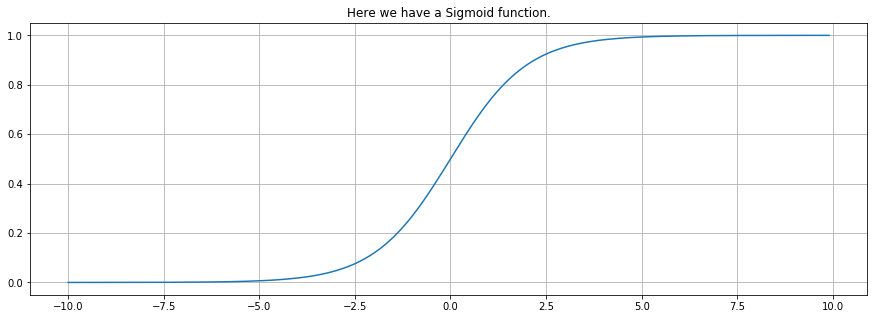

In [15]:
from scipy.special import expit
myx = np.arange(-10,10,.1)
plt.figure(figsize=(15,5))
plt.plot(myx,expit(myx))
plt.title("Here we have a Sigmoid function.")
plt.grid(True)

## Our data

Suppose we want to classifiy datapoints of human body parameters by the gender. In this example, we will observe weight, height, hair lenght. In real world, this is of course not enough to reliably distinguish between female and male, but for the sake of this example it is enough.

Columns:
* $x_0$ - just 1
* $x_1$ - weight in kg
* $x_2$ - height in cm
* $x_3$ - hair lenght in cm

Labels:
* 0 - represents class FEMALE
* 1 - represents class MALE

$$
X =
\begin{bmatrix}
    1 & 65 & 180 & 50 \\
    1 & 49 & 155 & 25 \\
    1 & 80 & 183 & 0.2 \\
    1 & 78 & 175 & 5 \\
\end{bmatrix}, 
y = 
\begin{bmatrix}
    0  \\
    0  \\
    1 \\
    1  \\
\end{bmatrix}\\
$$

In [16]:
# Create our data matrices
X = np.array([[65.,180.,50.], [49.,155.,25.], [80.,183.,0.2], [78.,175.,5.]])
y = np.array([[0.],[0.],[1.],[1.]])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) # goes through all our data and computes the meand and std
X = scaler.transform(X) # get the transformed data
# Insert column of 1's into the standardized "X" matrix
X = np.insert(X,0,1,axis=1)
X

array([[ 1.        , -0.24214029,  0.61828458,  1.5253883 ],
       [ 1.        , -1.53355519, -1.67165832,  0.25210925],
       [ 1.        ,  0.96856117,  0.89307773, -1.01098356],
       [ 1.        ,  0.80713431,  0.160296  , -0.76651399]])

## Model (or hypothesis)

Introducing the Sigmoid function $g(x)$, also called Logistic function as a nonlinearity to our model will give us the possibility to use regression for classification. Sigmoid function does only one thing, it maps real number to the interval $<0,1>$.
We can use ```expit``` function from scipy library, which is a vectorized sigmoid function. We just need to apply this nonlinearity to the result of our regression model.

The formulas looks like this:

$$ g(x) = \frac{e^x}{1 + e^x} $$

$$h_θ(x) = g(Xθ)$$ 

The result of this model can be interpreted as a probability of the $y = 1$, given $x$ and $θ$.
If the result is 0.6, we can tell that $x$, given $θ$ belongs to class 1 with $60\%$ probability.

## Cost function (or loss function)
To ensure that the Cost function is convex, we redefine it as follows:

$$J(θ) = \frac{1}{m} \sum_{i=1}^m Cost(h_θ(x^{(i)}) - y^{(i)})$$

where the function $Cost()$ is defined as follows:

$$\hbox{if } y = 0 : Cost(h_θ(x),y) = -log(h_θ(x))$$

$$\hbox{if } y = 1 : Cost(h_θ(x),y) = -log(1-h_θ(x))$$

The whole function then can be written as:

$$J(θ) = - \frac{1}{m} \sum_{i=1}^m [y^{(i)} log(h_θ(x^{(i)})) + (1 - y^{(i)}) log(1 - h_θ(x^{(i)}))]$$

In [17]:
def logistic_hypothesis(x, theta):
    return expit(hypothesis(x,theta))

def logistic_cost(x, y, theta, m):
    h = logistic_hypothesis(x, theta)
    J = (-1/m) * (np.sum(y * np.log(h) + (1 - y) * (np.log(1-h))))
    return J

In [18]:
n = X.shape[-1] # number of features
initial_theta = np.zeros((n,1))

# Hyperparameters
alpha = 0.1
iters = 1000

# Training
theta, theta_history, loss_history = gradient_descent(X, y, initial_theta, alpha, iters, 
                                                      cf=logistic_cost, hypo=logistic_hypothesis)
print('Learned scaled theta:', theta.ravel())

Epoch: 1 	| Loss: 0.6931471805599453
Epoch: 2 	| Loss: 0.6479139086043042
Epoch: 3 	| Loss: 0.6070615332479969
Epoch: 4 	| Loss: 0.5701280273260044
Epoch: 5 	| Loss: 0.5366881247218757
Epoch: 6 	| Loss: 0.5063561303996531
Epoch: 7 	| Loss: 0.4787860822508703
Epoch: 8 	| Loss: 0.4536701588903796
Epoch: 9 	| Loss: 0.4307360413020066
Epoch: 10 	| Loss: 0.4097437475779631
Epoch: 11 	| Loss: 0.39048229707317506
Epoch: 12 	| Loss: 0.37276643251473107
Epoch: 13 	| Loss: 0.35643353502687347
Epoch: 14 	| Loss: 0.3413408021908364
Epoch: 15 	| Loss: 0.3273627165610004
Epoch: 16 	| Loss: 0.3143888054308369
Epoch: 17 	| Loss: 0.30232167714658714
Epoch: 18 	| Loss: 0.29107531117736146
Epoch: 19 	| Loss: 0.28057357579503156
Epoch: 20 	| Loss: 0.270748946752509
Epoch: 21 	| Loss: 0.2615414015441682
Epoch: 22 	| Loss: 0.25289746589085915
Epoch: 23 	| Loss: 0.24476939151550514
Epoch: 24 	| Loss: 0.23711444676391738
Epoch: 25 	| Loss: 0.22989430400891586
Epoch: 26 	| Loss: 0.22307450996619663
Epoch: 27 	

In [19]:
# We define the humans for which we do not know the gender
our_data = np.array([[90.,175.,30.], [50.,183.,20]])

# We need to standardize it by trained scaler and add 1 as first column
our_data = scaler.transform(our_data)
our_data = np.insert(our_data,0,1,axis=1)

# Get the predictions
result = logistic_hypothesis(our_data, theta)
print(result)
print('\nHuman no.1 belongs to class 1 (MALE) with probability {0:.2f}%.'.format(result.ravel()[0]*100))
print('Human no.2 belongs to class 1 (MALE) with probability {0:.2f}%.'.format(result.ravel()[1]*100))

[[0.94512344]
 [0.0640472 ]]

Human no.1 belongs to class 1 (MALE) with probability 94.51%.
Human no.2 belongs to class 1 (MALE) with probability 6.40%.


### References
* Material strongly inspired by Andrew Ng's coursera course "Machine Learning"
* Some code (mainly plotting) inspired by https://github.com/kaleko/CourseraML